# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Susi Susilawati]
- **Email:** [suslwt04@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap tingkat polusi udara?


- Apakah terdapat tren peningkatan atau penurunan kualitas udara berdasarkan data historis?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read dataset
df_all = pd.read_csv('dashboard/data_all.csv')
df_all

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382163,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
382164,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
382165,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
382166,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- dari keseluruhan data terdapat 382168 rows dan 18 columns

In [ ]:
#menampilkan data teratas
df_all.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
#menampilkan data terbawah
df_all.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
382163,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
382164,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
382165,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
382166,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
382167,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


### Assessing Data

In [ ]:
#info data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 52.5+ MB


In [ ]:
#cek missing value
df_all.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


pada data tersebut tidak terdapat missing value

In [ ]:
#cek duplikat data
df_all.duplicated().sum()

0

pada data tersebut tidak terdapat duplicate value

In [ ]:
# statistik data
df_all.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

In [ ]:
df_all.dropna(axis=0, inplace=True)

In [ ]:
df_all.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [ ]:
#menyalin dataframe yang sudah bersih
data_clean= df_all.copy()

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Mengonversi data waktu menjadi format datetime
data_clean['datetime'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']])

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        382168 non-null  int64         
 1   year      382168 non-null  int64         
 2   month     382168 non-null  int64         
 3   day       382168 non-null  int64         
 4   hour      382168 non-null  int64         
 5   PM2.5     382168 non-null  float64       
 6   PM10      382168 non-null  float64       
 7   SO2       382168 non-null  float64       
 8   NO2       382168 non-null  float64       
 9   CO        382168 non-null  float64       
 10  O3        382168 non-null  float64       
 11  TEMP      382168 non-null  float64       
 12  PRES      382168 non-null  float64       
 13  DEWP      382168 non-null  float64       
 14  RAIN      382168 non-null  float64       
 15  wd        382168 non-null  object        
 16  WSPM      382168 non-null  float64    

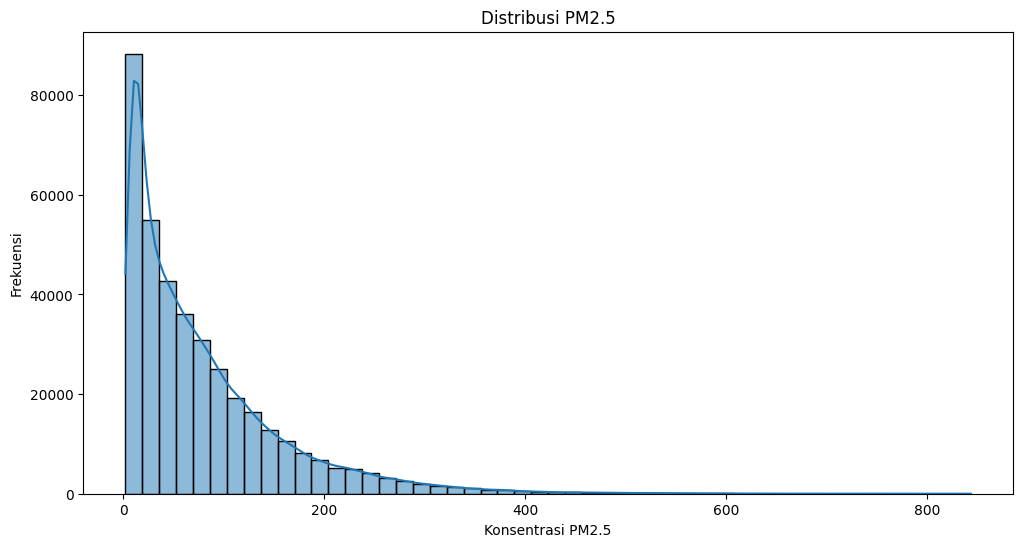

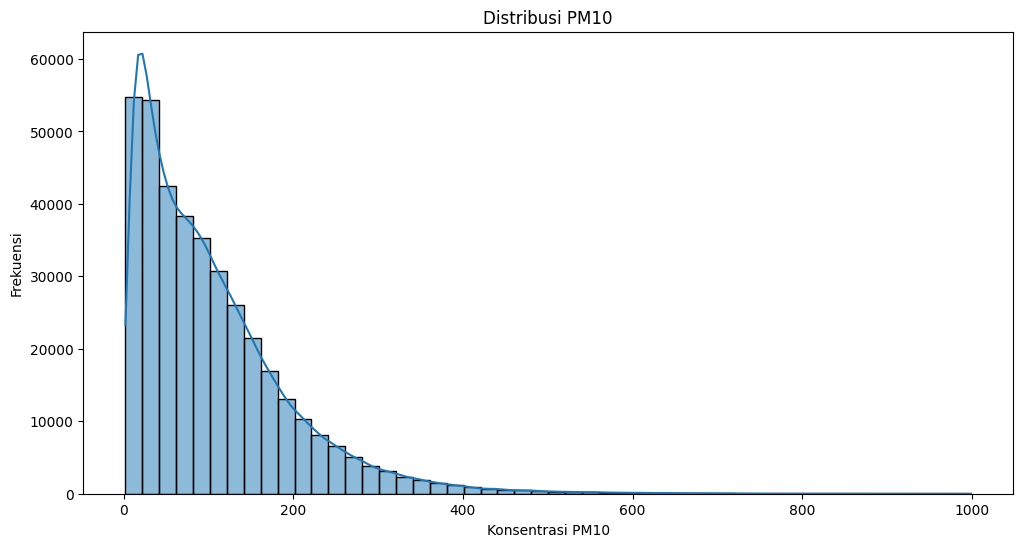

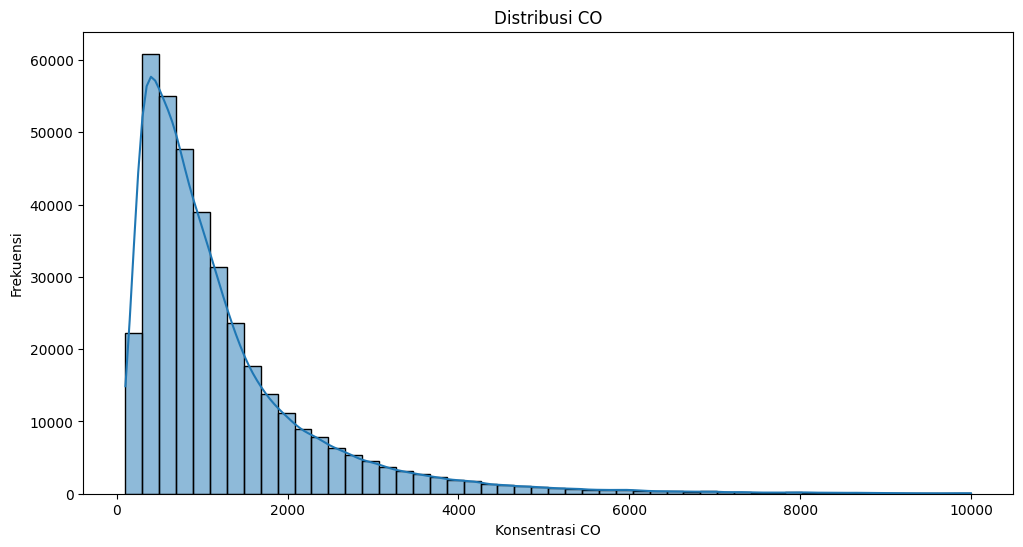

In [ ]:
# Mengecek distribusi data
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data_clean, x='PM2.5', bins=50, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data_clean, x='PM10', bins=50, kde=True)
plt.title('Distribusi PM10')
plt.xlabel('Konsentrasi PM10')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data_clean, x='CO', bins=50, kde=True)
plt.title('Distribusi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

Insight :
1. Distribusi PM2.5
- Distribusi right-skewed menunjukkan konsentrasi PM2.5 rendah, namun sesekali terjadi lonjakan signifikan. Hal ini bisa dipengaruhi oleh faktor cuaca, aktivitas industri, atau lalu lintas.
2. Distribusi PM10
- Distribusi PM10 right-skewed, dengan sebagian besar konsentrasi rendah dan beberapa lonjakan tinggi, yang dapat dipengaruhi oleh aktivitas konstruksi atau angin pembawa debu.
3. Distribusi CO (Karbon Monoksida)
- Distribusi CO right-skewed, dengan sebagian besar nilai rendah dan beberapa lonjakan tinggi, kemungkinan akibat emisi kendaraan, aktivitas industri, kemacetan, atau ventilasi udara yang buruk.



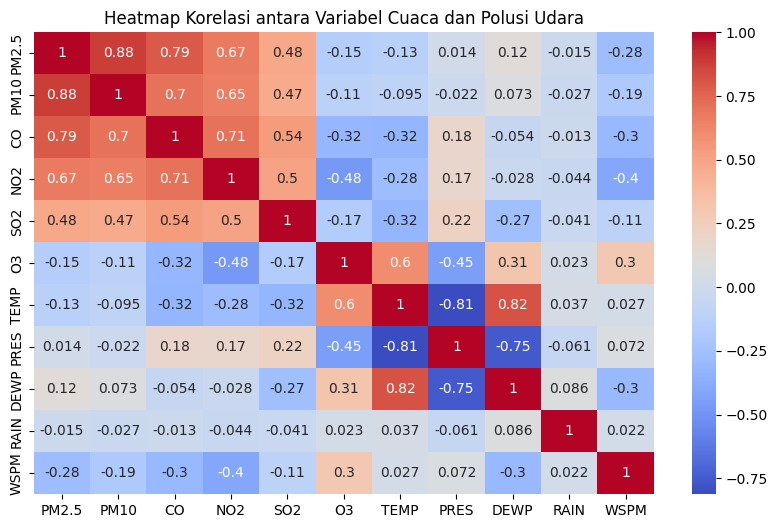

In [ ]:
# Mengecek korelasi antara variabel cuaca dan polusi udara
plt.figure(figsize=(10, 6))
sns.heatmap(data_clean[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN','WSPM']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antara Variabel Cuaca dan Polusi Udara')
plt.show()


Insight:
- Polusi udara (PM2.5, PM10, CO) cenderung lebih tinggi pada suhu rendah, tekanan rendah, dan kecepatan angin rendah.
- Ozon berperilaku berlawanan dengan partikel polusi lainnya, meningkat saat suhu tinggi.
- Kecepatan angin membantu mengurangi tingkat polusi dengan menyebarkan partikel di atmosfer.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap tingkat polusi udara?


VISUALISASI HUBUNGAN CUACA DAN POLUSI

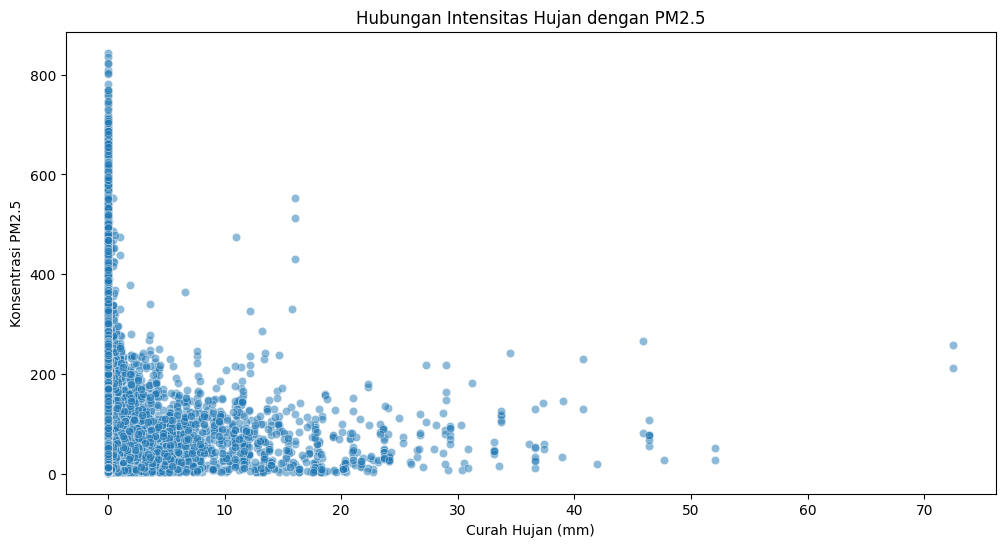

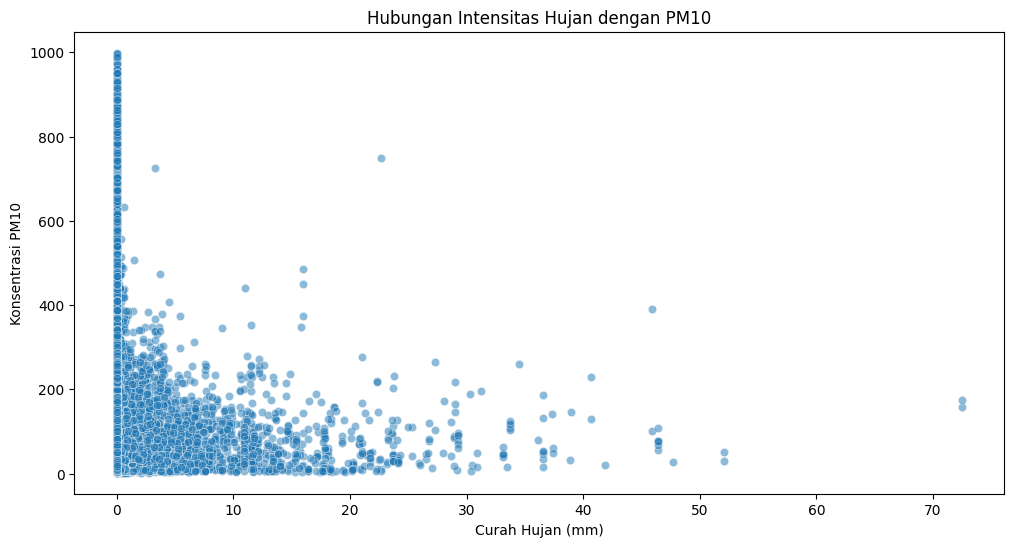

In [ ]:
# Hubungan Hujan dengan Polusi Udara
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_clean, x='RAIN', y='PM2.5', alpha=0.5)
plt.title('Hubungan Intensitas Hujan dengan PM2.5')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=data_clean, x='RAIN', y='PM10', alpha=0.5)
plt.title('Hubungan Intensitas Hujan dengan PM10')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi PM10')
plt.show()


Insight:
- **Hubungan Curah Hujan dengan Polusi Udara**  

1. **Penurunan Polusi dengan Curah Hujan Tinggi** – Konsentrasi PM2.5 dan PM10 menurun seiring meningkatnya curah hujan, karena hujan membersihkan polutan dari udara.  
2. **Polusi Tinggi saat Curah Hujan Rendah** – Pada curah hujan mendekati nol, polusi bervariasi dengan beberapa lonjakan tinggi, menunjukkan akumulasi polutan dalam kondisi atmosfer stabil.  
3. **Efektivitas Pembersihan Udara** – Curah hujan di atas 10 mm secara konsisten menurunkan konsentrasi polutan, menegaskan peran hujan dalam membersihkan udara.

### Pertanyaan 2:

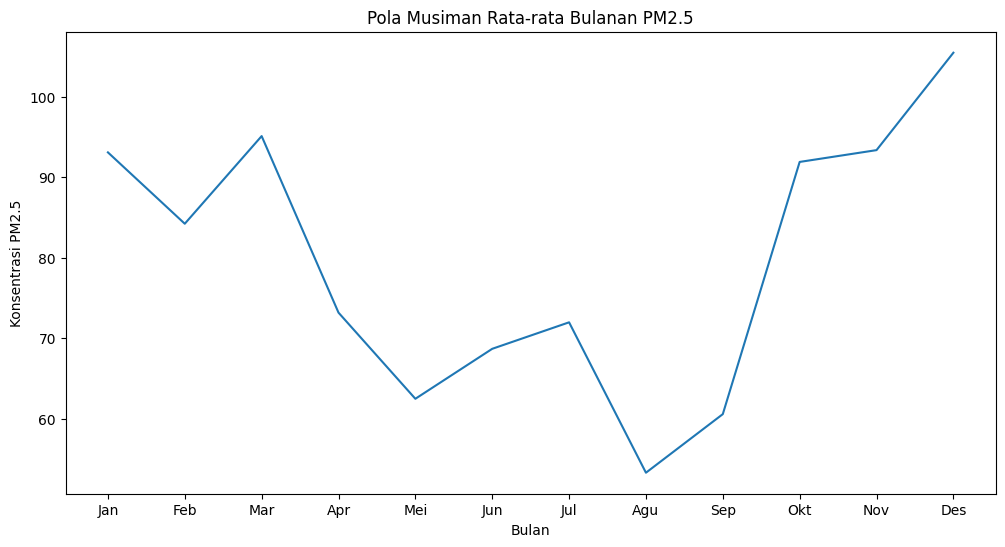

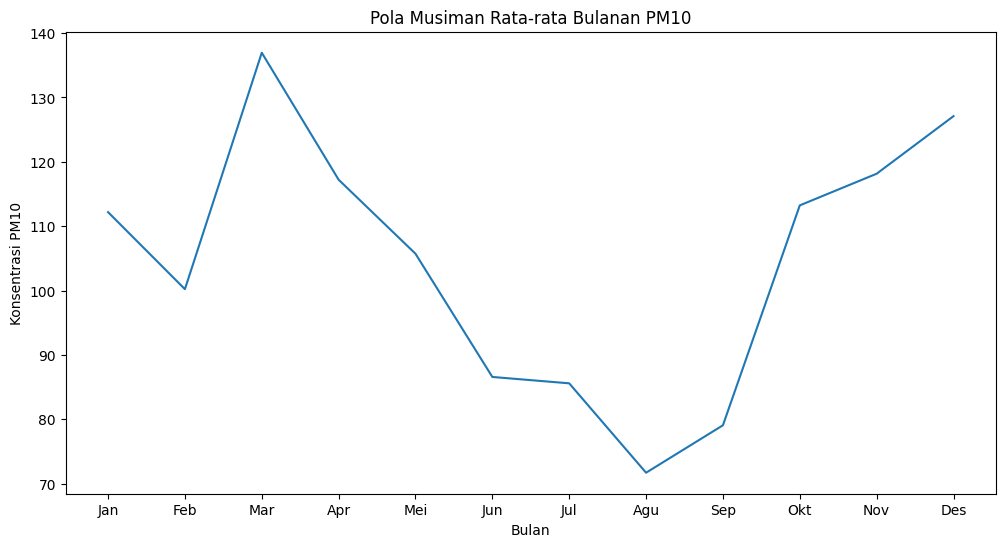

In [ ]:
#Pola Musiman Kualitas Udara
plt.figure(figsize=(12,6))
data_clean.groupby(data_clean['datetime'].dt.month)['PM2.5'].mean().plot()
plt.title('Pola Musiman Rata-rata Bulanan PM2.5')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM2.5')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

plt.figure(figsize=(12,6))
data_clean.groupby(data_clean['datetime'].dt.month)['PM10'].mean().plot()
plt.title('Pola Musiman Rata-rata Bulanan PM10')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM10')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()


Insight:
- Polusi lebih tinggi di musim dingin (Desember–Maret) akibat emisi pemanasan, inversi suhu, dan stabilitas atmosfer. Menurun di musim panas (Mei–Agustus) karena curah hujan dan atmosfer dinamis. Lonjakan kembali terjadi di musim gugur (September–November) karena aktivitas industri dan perubahan cuaca. Musim hujan pertengahan tahun membantu menurunkan polusi dengan mencuci atmosfer

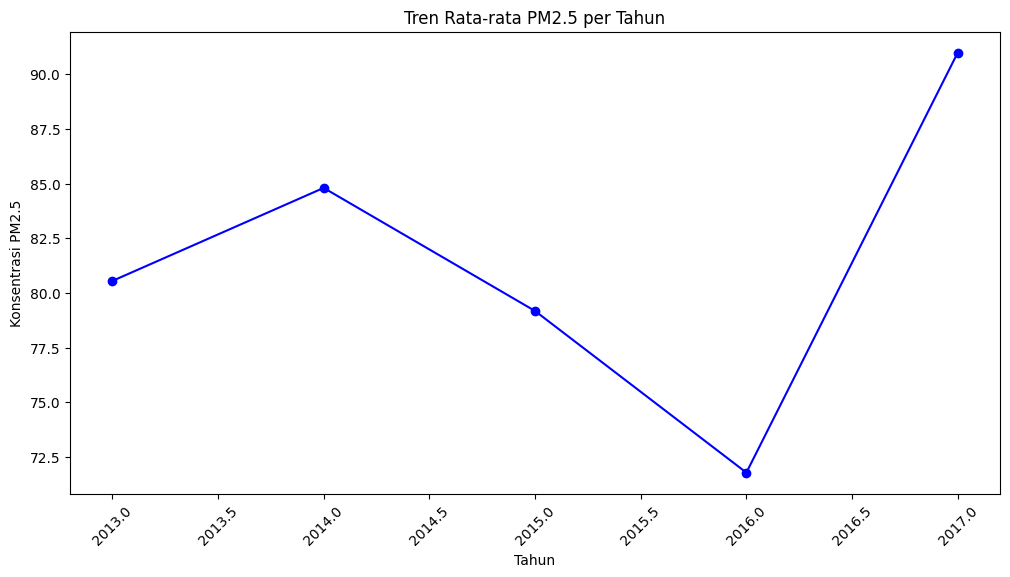

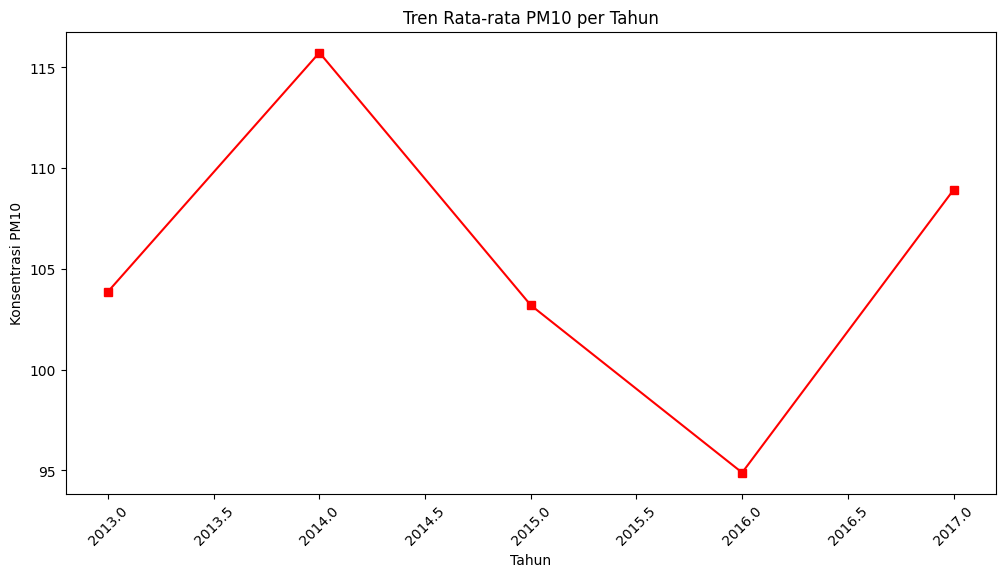

In [ ]:
# rata-rata PM2.5 per tahun
plt.figure(figsize=(12,6))
data_clean.groupby(data_clean['datetime'].dt.year)['PM2.5'].mean().plot(marker='o', color='b')
plt.title('Tren Rata-rata PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5')
plt.xticks(rotation=45)
plt.show()

# rata-rata PM10 per tahun
plt.figure(figsize=(12,6))
data_clean.groupby(data_clean['datetime'].dt.year)['PM10'].mean().plot(marker='s', color='r')
plt.title('Tren Rata-rata PM10 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM10')
plt.xticks(rotation=45)
plt.show()


**Insight:**
- **Tren Rata-rata PM2.5 dan PM10 per Tahun**  

1. **Pola Fluktuatif** – PM2.5 dan PM10 naik-turun setiap tahun, dipengaruhi faktor lingkungan atau kebijakan.  
2. **Penurunan 2016, Lonjakan 2017** – Tahun 2016 mencatat level terendah, kemungkinan akibat kebijakan atau cuaca, sementara 2017 menunjukkan peningkatan signifikan polusi.  
3. **PM10 Selalu Lebih Tinggi** – Wajar karena PM10 mencakup partikel lebih besar dibanding PM2.5.  
4. **Faktor Penyebab** – Cuaca, aktivitas industri dan transportasi, serta kebijakan lingkungan mempengaruhi tren polusi udara.

## Conclusion

1. Conclution pertanyaan 1
- Suhu udara memiliki pengaruh terhadap polusi udara. Konsentrasi **PM2.5 (Partikulat halus)** dan **PM10 (Debu kasar)** cenderung lebih tinggi pada suhu yang lebih rendah.
- Kecepatan angin juga berperan dalam penyebaran polusi. Kecepatan angin yang lebih tinggi dapat membantu mengurangi konsentrasi polutan dengan menyebarkan partikel di atmosfer.
- Hujan memiliki efek pembersihan udara. Saat curah hujan meningkat, konsentrasi **PM2.5 (Partikulat halus)** dan **PM10 (Debu kasar)** cenderung menurun karena partikel polutan terbawa oleh air hujan.

2. Conclution pertanyaan 2
- Tren kualitas udara mengalami fluktuasi dari tahun ke tahun, dengan periode tertentu mengalami peningkatan atau penurunan polusi.
- Tahun 2016 menunjukkan penurunan signifikan dalam polusi udara, sementara 2017 terjadi peningkatan yang cukup drastis.
- Polusi udara lebih tinggi di musim dingin dibandingkan musim panas. Hal ini dapat disebabkan oleh **inversi suhu**, yaitu kondisi saat udara dingin terperangkap di bawah lapisan udara hangat, menyebabkan polutan tetap berada di dekat permukaan tanah.

